In [1]:
import sys
parentdir = 'C:\\Users\\anaxa\\Documents\\Projects\\Synthetic avatar\\BAMT'
sys.path.insert(0,parentdir) 

In [5]:
import pandas as pd
import seaborn as sns
from bayesian.train_bn import structure_learning, parameter_learning
from preprocess.discretization import get_nodes_type, discretization, code_categories, get_nodes_sign
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from bayesian.sampling import generate_synthetics
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from visualization.visualization import draw_BN
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
from scipy.stats import norm

In [3]:
data = pd.read_csv('../data/daks_processed_with_rf_ntg.csv')
data

,Field name,Reservoir unit,Country,Region,Tectonic regime,Onshore/offshore,Hydrocarbon type,Productive area,Period,Depositional system,...,Permeability,Structural setting,Trapping mechanism,Depth,Oil density,Oil recovery factor,Condensate recovery factor,Gas recovery factor,NTG,NTG_calc
0,A.J.BERMUDEZ,UNNAMED (CUNDUACAN FIELD),MEXICO,LATIN AMERICA,COMPRESSION,ONSHORE,OIL,NaN,CRETACEOUS,FORESLOPE,...,NaN,WRENCH,FOLD,3819.8,876.160991,0.33,NaN,NaN,NaN,NaN
1,A.J.BERMUDEZ,UNNAMED (SAMARIA FIELD),MEXICO,LATIN AMERICA,COMPRESSION,ONSHORE,OIL,24700.0,CRETACEOUS,FORESLOPE,...,NaN,WRENCH,FOLD,4120.1,876.160991,0.25,NaN,NaN,NaN,NaN
2,AB TEYMUR,ILAM,IRAN,MIDDLE EAST,COMPRESSION,ONSHORE,OIL,130910.0,CRETACEOUS,LOW-ENERGY CARBONATE MUD,...,NaN,FORELAND,FOLD,3063.1,904.153355,0.13,NaN,NaN,0.650,0.668255
3,AB TEYMUR,SARVAK-1,IRAN,MIDDLE EAST,COMPRESSION,ONSHORE,OIL,133380.0,CRETACEOUS,LOW-ENERGY CARBONATE MUD,...,NaN,FORELAND,FOLD,3263.1,909.967846,0.13,NaN,NaN,0.750,0.730104
4,ABKATUN,TAMABRA,MEXICO,LATIN AMERICA,COMPRESSION,OFFSHORE,OIL,58045.0,CRETACEOUS-PALEOGENE,FORESLOPE,...,3.1,SALT,FOLD,2920.7,887.147335,0.40,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,ПРИОБСКОЕ,Пласт: АС 10.0-1,RUSSIA,SIBERIA,NaN,ONSHORE,OIL,NaN,CRETACEOUS,DEEP MARINE,...,23.6,NaN,NaN,2487.0,880.800000,NaN,NaN,NaN,0.765,0.159504
1108,ПРИОБСКОЕ,Пласт: АС 10.1-3,RUSSIA,SIBERIA,NaN,ONSHORE,OIL,NaN,CRETACEOUS,DEEP MARINE,...,32.7,NaN,NaN,2624.0,NaN,NaN,NaN,NaN,0.700,0.399123
1109,ПРИОБСКОЕ,Пласт: АС 10.4,RUSSIA,SIBERIA,NaN,ONSHORE,OIL,NaN,CRETACEOUS,DEEP MARINE,...,33.4,NaN,NaN,2604.0,NaN,NaN,NaN,NaN,0.685,0.209756
1110,ПРИОБСКОЕ,Пласт: АС 12.1,RUSSIA,SIBERIA,NaN,ONSHORE,OIL,NaN,CRETACEOUS,DEEP MARINE,...,28.7,NaN,NaN,2628.0,875.450000,NaN,NaN,NaN,0.755,0.958904


In [4]:
columns = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
data = data[columns]
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Tectonic regime,Period,Lithology,Structural setting,Gross,Netpay,Porosity,Permeability,Depth
0,COMPRESSION,JURASSIC,LIMESTONE,FORELAND,76.2,56.1,21.0,410.0,1844.5
1,EXTENSION,CRETACEOUS,SANDSTONE,RIFT,227.1,43.9,10.0,8.0,3134.8
2,STRIKE-SLIP,NEOGENE,THINLY-BEDDED SANDSTONE,WRENCH,35.1,20.1,22.0,200.0,3000.9
3,STRIKE-SLIP,NEOGENE,SANDSTONE,WRENCH,155.2,125.0,20.0,300.0,3200.9
4,COMPRESSION,CRETACEOUS,LIMESTONE,SALT,76.2,30.5,21.0,60.0,1510.7
...,...,...,...,...,...,...,...,...,...
512,EXTENSION,PALEOGENE,SANDSTONE,RIFT,50.0,18.9,23.2,121.0,1439.3
513,EXTENSION,PALEOGENE,SANDSTONE,RIFT,89.9,24.1,21.0,60.0,2310.7
514,EXTENSION,MESOZOIC,VOLCANICS,RIFT,150.0,59.1,12.7,3.6,3000.9
515,COMPRESSION,CARBONIFEROUS,SANDSTONE,FORELAND,79.9,10.1,24.0,30.0,570.1


C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


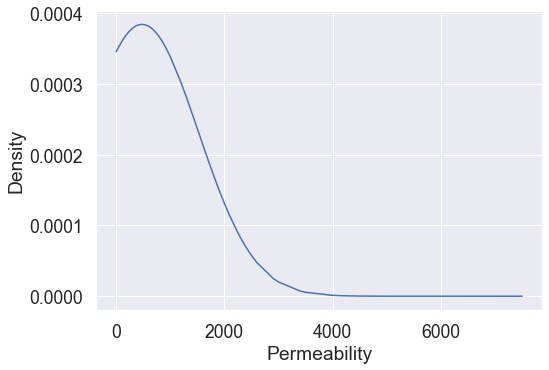

In [6]:
loc, scale = norm.fit(data['Permeability'])
sns.set(font_scale=1.6)
x = sorted(data['Permeability'].values)
y = [norm.pdf(xi, loc, scale) for xi in x]
sns.lineplot(x, y)
plt.xlabel('Permeability')
plt.ylabel('Density')
plt.savefig('Permeability_density.pdf')

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


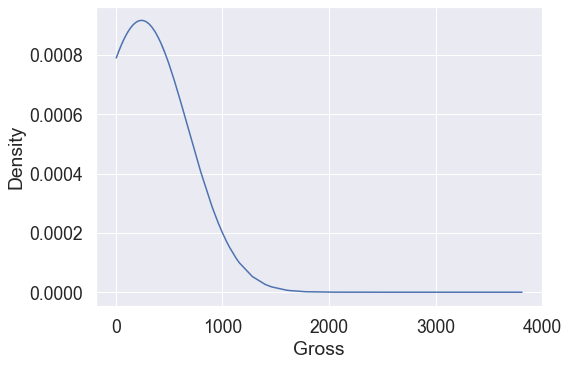

In [7]:
loc, scale = norm.fit(data['Gross'])
sns.set(font_scale=1.6)
x = sorted(data['Gross'].values)
y = [norm.pdf(xi, loc, scale) for xi in x]
sns.lineplot(x, y)
plt.xlabel('Gross')
plt.ylabel('Density')
plt.savefig('Gross_density.pdf')

In [8]:
df1 = data.loc[data['Lithology'] == 'SANDSTONE']
df2 = data.loc[data['Lithology'] == 'LIMESTONE']

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


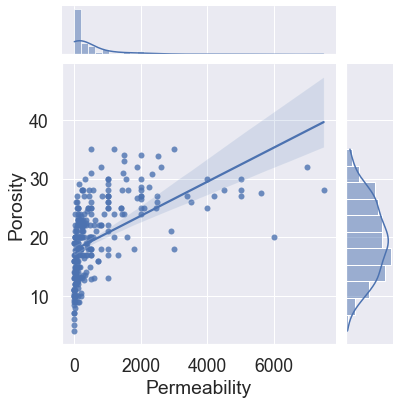

In [11]:
sns.jointplot(df1['Permeability'], df1['Porosity'], kind='reg')
plt.savefig('Sandstone_plot.pdf')

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


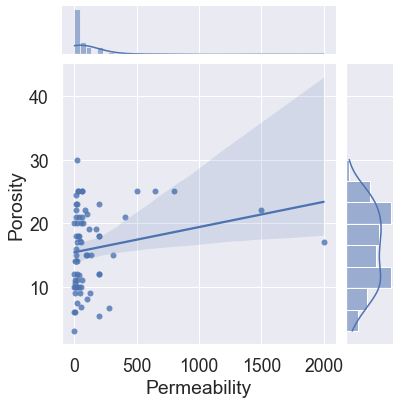

In [12]:
sns.jointplot(df2['Permeability'], df2['Porosity'], kind='reg')
plt.savefig('Limestone_plot.pdf')

C:\Users\anaxa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


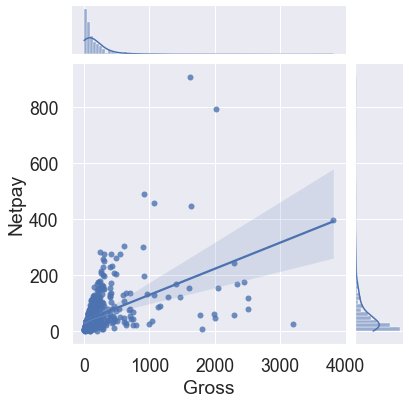

In [13]:
sns.jointplot(data['Gross'], data['Netpay'], kind='reg')
plt.savefig('Gross_Netpay_plot.pdf')